## This is the main notebook where we will take the processed data and apply supervised learning techniques to produce a model for EAF power consumption.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
pd.options.display.max_columns = 120

np.random.seed(1147)

# Importing and Manually Cleaning Data
Manual data cleaning steps are driven by metallurgical / process knowledge of the EAF (i.e., qualitative and not data-driven).

In [3]:
df = pd.read_csv('design_matrix_ver_1.csv')
df = df.set_index(['HEATID', 'DATETIME'])
df.head()

,,16A,25A,25A1,26A,3A,3A (shop pipe waste),3ACh,3B23,Aluminum briquet,Artificial graphite 0.1-2.5 mm,B11,B68,Briquets 6A,Coke 10-30 mm,FMN 78 GOST4755-91 class 4,FOMI,FOMI B2,FeCr025,FeSi65-4,Ferrous scrap 6A,Flux FIM,High-carbon ferrochromium,Hot briquet iron,In-house produced lime,Iron scrap,Ladle scrap,Lime,"Lime, grade 2",Liquid scrap,Magma,Magma-P,MnSi17A,Mo material briquet,Mo pellets,SIMP-RM,Scrap 3B22,Scrap B23,Scrap G/B 25A,Scrap G/B 25AS,Secondary aluminum AV 87,Separation scrap,Separation waste 3A,Shram 75,Steel scrap G/B 25A,Steelmaking iron,Vanadium alloy,Total_Scrap_Charge,Total_Scrap_Charge_Prev,25A Added,25A1 Added,3A Added,3ACh Added,AShM 75,Aluminum briquet Added,Anthracite,Artificial graphite 0.1-2.5 mm Added,B68 Added,Briquet BMK-60,CCM 03-10mm,CCM 30-60 mm,Coke 10-30 mm Added,Dolomite,FGM material,FMN 78 GOST4755-91 class 4 Added,FOMI Added,FOMI B2 Added,FeCr 850A,FeCr025 Added,FeSi 45,FeSi65-4 Added,Ferrous scrap 6A Added,Flux FIM Added,Flux FM-2-1,High-carbon ferrochromium Added,Hot briquet iron Added,In-house produced lime Added,KRS-65,KRS-65 briquets,KShU 75,Lime Added,"Lime, grade 2 Added",Liquid scrap Added,Magma Added,Magma-P Added,Magnesite brick scrap,MnSi17A Added,Mo pellets Added,Pellets AV-87,SIMP-RM Added,Scrap G/B 25A Added,Scrap G/B 25AS Added,Secondary aluminum AV 87 Added,Separation waste 3A Added,Steel scrap G/B 25A Added,Steelmaking iron Added,total_charging_time,num_baskets,VALC,VALSI,VALMN,VALP,VALS,VALCU,VALCR,VALMO,VALNI,VALAS,VALSN,VALN,TEMP,VALO2_PPM,O2_AMOUNT,GAS_AMOUNT,INJ_AMOUNT_CARBON,MW
HEATID,DATETIME,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5F0002,2015-01-01 01:31:00.000000000,0.0,0.0,0.0,0.0,105928.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17560.0,0.0,128590.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,514.0,0.0,0.0,0.0,0.0,835.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,593.0,0.0,0.0,0.0,0.0,0.0,0.0,821.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1080.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1627.0,383.000000,3659.0,1160.0,1021.0,48.625
5F0003,2015-01-01 02:17:30.000000000,0.0,0.0,0.0,0.0,108033.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5473.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15320.0,0.0,128826.0,128590.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,511.0,0.0,0.0,0.0,0.0,831.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,594.0,0.0,0.0,0.0,0.0,0.0,0.0,822.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,960.0,2,0.0823,0.0172,0.0615,0.0823,0.0361,0.1913,0.0916,0.0172,0.1075,0.0053,0.0068,0.0361,1641.0,683.000000,3469.0,1117.0,957.0,48.625
5F0004,2015-01-01 03:17:30.000000000,0.0,0.0,0.0,0.0,128245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5470.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,133715.0,128826.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1810.0,0.0,0.0,0.0,0.0,830.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,592.0,0.0,0.0,0.0,0.0,0.0,0.0,823.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1020.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1636.0,700.000000,3605.0,1204.0,789.0,47.375
5F0005,2015-01-01 04:06:00.000000000,0.0,0.0,0.0,0.0,106941.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5472.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16820.0,0.0,129233.0,133715.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,513.0,0.0,0.0,0.0,0.0,829.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,592.0,0.0,0.0,0.0,0.0,0.0,0.0,819.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1080.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1630.0,625.333333,3678.0,1191.0,812.0,49.250
5F0006,2015-01-01 04:54:24.000000000,0.0,0.0,0.0,0.0,127035.0,0.0,0.0,0.0,0.0,0.0,

In [4]:
# Ignore this cell for now, we can return to look at importance of steel chemistry later.

# df_with_ls_analysis = df[~df['VALC'].isna()]    # Split the dataset into those with final steel chemical analysis, and those without. Later on we can test how important it is to have this feature.
# # df_with_ls_analysis = df_with_ls_analysis.dropna(axis='columns')
# df_with_ls_analysis = df_with_ls_analysis.dropna(axis='rows')
# df_with_ls_analysis.describe()

In [5]:
# df_with_ls_analysis_train, df_with_ls_analysis_test = train_test_split(df_with_ls_analysis, train_size=0.7)

In [6]:
df = df.drop(columns=df.columns[df.var(axis='rows') == 0])    # Remove features with perfectly 0 variance

df = df[df['VALC'].isna()]    # Split the dataset into those with final steel chemical analysis, and those without. For now, remove the steel chemistry feature as is is mostly (~85%) empty.
df = df.dropna(axis='columns', how='all')   # Drop any columns with all nans
df = df.dropna(axis='rows') # drop rows with nans

FEATURES = list(df.columns[:-1])
TARGET = 'MW'

df.describe()

,16A,25A,25A1,26A,3A,3ACh,3B23,Aluminum briquet,Artificial graphite 0.1-2.5 mm,B11,B68,Briquets 6A,Coke 10-30 mm,FMN 78 GOST4755-91 class 4,FOMI,FOMI B2,FeSi65-4,Ferrous scrap 6A,Flux FIM,High-carbon ferrochromium,Hot briquet iron,In-house produced lime,Iron scrap,Ladle scrap,Lime,"Lime, grade 2",Liquid scrap,Magma,Magma-P,MnSi17A,Mo material briquet,Mo pellets,SIMP-RM,Scrap 3B22,Scrap B23,Scrap G/B 25A,Scrap G/B 25AS,Secondary aluminum AV 87,Separation scrap,Separation waste 3A,Shram 75,Steel scrap G/B 25A,Steelmaking iron,Vanadium alloy,Total_Scrap_Charge,Total_Scrap_Charge_Prev,25A1 Added,3A Added,3ACh Added,AShM 75,Aluminum briquet Added,Anthracite,Artificial graphite 0.1-2.5 mm Added,Briquet BMK-60,CCM 03-10mm,CCM 30-60 mm,Coke 10-30 mm Added,Dolomite,FGM material,FMN 78 GOST4755-91 class 4 Added,FOMI B2 Added,FeCr 850A,FeCr025 Added,FeSi 45,FeSi65-4 Added,Flux FIM Added,Flux FM-2-1,High-carbon ferrochromium Added,In-house produced lime Added,KRS-65,KRS-65 briquets,KShU 75,Lime Added,"Lime, grade 2 Added",Liquid scrap Added,Magma Added,Magma-P Added,Magnesite brick scrap,MnSi17A Added,Mo pellets Added,SIMP-RM Added,Scrap G/B 25A Added,Scrap G/B 25AS Added,Secondary aluminum AV 87 Added,Steel scrap G/B 25A Added,total_charging_time,num_baskets,TEMP,VALO2_PPM,O2_AMOUNT,GAS_AMOUNT,INJ_AMOUNT_CARBON,MW
count,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.00000,16911.000000,16911.000000,16911.00000,16911.000000,16911.0,16911.000000,16911.000000,16911.000000,16911.0,16911.000000,16911.000000,16911.000000,16911.0,16911.000000,16911.0,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.0,16911.000000,16911.000000,16911.000000,16911.0,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.0,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.0,16911.000000,16911.000000,16911.0,16911.0,16911.000000,16911.000000,16911.000000,16911.0,16911.000000,16911.000000,16911.0,16911.000000,16911.0,16911.000000,16911.000000,16911.000000,16911.000000,16911.00000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000
mean,5046.419135,136.103542,2292.335285,11.216368,113957.310271,1066.367157,2.877654,0.011531,7.033292,147.269824,3.815859,57.930341,278.731654,0.32535,0.065697,1.135888,0.82195,1159.586482,0.0,0.118266,434.353557,3649.017976,0.0,4.668559,599.460647,38.259949,0.0,2.481817,0.0,1.833126,0.158477,1.728461,0.191946,1.924191,0.0,474.818225,100.303235,0.639702,0.0,60.985749,0.295784,277.729880,456.906156,1.035953,130276.268937,130073.822068,0.0,15.181243,2.360830,0.147833,0.036189,0.563125,1.596594,0.404293,0.0,5.283248,1063.837739,0.0,0.0,0.032523,434.388505,0.257111,0.0,0.052983,0.716693,0.0,41.997694,0.0,399.085566,0.005913,0.867305,0.013423,308.92425,2.433623,156.998403,475.866064,9.166578,8.113476,6.309917,0.026610,0.620365,0.495535,0.312814,3.791319,0.590148,2659.102359,2.068299,1635.502847,982.395617,4292.221335,762.949441,901.256519,48.570531
std,4942.693717,904.675505,4836.046339,316.184722,25724.755668,5536.199276,154.345988,1.088153,76.715107,2408.968325,109.313827,471.033350,435.011622,42.30931,8.543374,36.175734,29.97493,2945.520759,0.0,10.874706,2038.475634,2132.622732,0.0,190.780388,1564.657995,439.287174,0.0,82.101984,0.0,44.137823,11.689293,43.726190,3.028184,144.609793,0.0,1893.369748,709.274901,9.018018,0.0,775.131590,38.464407,1722.792034,3111.309822,77.838554,24784.114169,24850.582229,0.0,955.840866,242.692077,19.224514,1.925887,24.188842,41.022482,14.594623,0.0,105.961903,593.358647,0.0,0.0,4.229393,414.238910,20.401624,0.0,4.033761,25.792826,0.0,154.164559,0.0,685.923160,0.768981,23.777

In [7]:
df_train, df_test = train_test_split(df, train_size=0.7)

df_train.describe()

,16A,25A,25A1,26A,3A,3ACh,3B23,Aluminum briquet,Artificial graphite 0.1-2.5 mm,B11,B68,Briquets 6A,Coke 10-30 mm,FMN 78 GOST4755-91 class 4,FOMI,FOMI B2,FeSi65-4,Ferrous scrap 6A,Flux FIM,High-carbon ferrochromium,Hot briquet iron,In-house produced lime,Iron scrap,Ladle scrap,Lime,"Lime, grade 2",Liquid scrap,Magma,Magma-P,MnSi17A,Mo material briquet,Mo pellets,SIMP-RM,Scrap 3B22,Scrap B23,Scrap G/B 25A,Scrap G/B 25AS,Secondary aluminum AV 87,Separation scrap,Separation waste 3A,Shram 75,Steel scrap G/B 25A,Steelmaking iron,Vanadium alloy,Total_Scrap_Charge,Total_Scrap_Charge_Prev,25A1 Added,3A Added,3ACh Added,AShM 75,Aluminum briquet Added,Anthracite,Artificial graphite 0.1-2.5 mm Added,Briquet BMK-60,CCM 03-10mm,CCM 30-60 mm,Coke 10-30 mm Added,Dolomite,FGM material,FMN 78 GOST4755-91 class 4 Added,FOMI B2 Added,FeCr 850A,FeCr025 Added,FeSi 45,FeSi65-4 Added,Flux FIM Added,Flux FM-2-1,High-carbon ferrochromium Added,In-house produced lime Added,KRS-65,KRS-65 briquets,KShU 75,Lime Added,"Lime, grade 2 Added",Liquid scrap Added,Magma Added,Magma-P Added,Magnesite brick scrap,MnSi17A Added,Mo pellets Added,SIMP-RM Added,Scrap G/B 25A Added,Scrap G/B 25AS Added,Secondary aluminum AV 87 Added,Steel scrap G/B 25A Added,total_charging_time,num_baskets,TEMP,VALO2_PPM,O2_AMOUNT,GAS_AMOUNT,INJ_AMOUNT_CARBON,MW
count,11837.000000,11837.000000,11837.000000,11837.000000,11837.000000,11837.000000,11837.000000,11837.000000,11837.000000,11837.000000,11837.000000,11837.000000,11837.000000,11837.0,11837.000000,11837.000000,11837.000000,11837.000000,11837.0,11837.0,11837.000000,11837.000000,11837.0,11837.000000,11837.000000,11837.000000,11837.0,11837.000000,11837.0,11837.000000,11837.000000,11837.000000,11837.000000,11837.000000,11837.0,11837.000000,11837.00000,11837.000000,11837.0,11837.000000,11837.000000,11837.000000,11837.000000,11837.000000,11837.000000,11837.000000,11837.0,11837.000000,11837.0,11837.000000,11837.000000,11837.000000,11837.000000,11837.000000,11837.0,11837.000000,11837.000000,11837.0,11837.0,11837.000000,11837.000000,11837.000000,11837.0,11837.000000,11837.000000,11837.0,11837.000000,11837.0,11837.000000,11837.000000,11837.000000,11837.000000,11837.000000,11837.000000,11837.000000,11837.000000,11837.000000,11837.000000,11837.000000,11837.0,11837.000000,11837.00000,11837.0,11837.000000,11837.000000,11837.000000,11837.000000,11837.000000,11837.000000,11837.000000,11837.000000,11837.000000,11837.000000
mean,5063.538734,142.935710,2330.021627,13.482301,113977.501563,1065.963589,2.730084,0.016474,7.024584,136.320858,3.835431,57.410661,277.737602,0.0,0.093858,1.045028,0.675847,1183.035820,0.0,0.0,437.707189,3655.488468,0.0,4.613500,600.926333,38.386669,0.0,1.676945,0.0,1.858579,0.123342,1.913492,0.229028,1.855200,0.0,483.317226,105.34012,0.645349,0.0,58.014953,0.422573,279.518459,442.216778,1.480020,130379.103996,130187.745544,0.0,6.783813,0.0,0.211202,0.043254,0.751457,1.393934,0.398158,0.0,4.742502,1071.035735,0.0,0.0,0.046464,434.022641,0.367323,0.0,0.046887,0.882825,0.0,43.292895,0.0,393.693081,0.008448,0.873786,0.009462,313.085833,2.287657,135.845231,474.254710,9.397651,8.099941,7.452733,0.0,0.658190,0.70795,0.0,2.133902,0.843119,2606.788882,2.069190,1635.414114,978.705190,4299.228098,763.853088,904.549126,48.602634
std,4965.460640,938.897673,4907.947460,342.467348,25803.118251,5547.420775,149.981402,1.300616,77.019508,2302.955421,111.828134,474.887843,440.312915,0.0,10.211587,33.642472,25.989367,2991.299728,0.0,0.0,2037.842990,2142.334896,0.0,173.655205,1566.476469,438.486154,0.0,46.910833,0.0,44.991749,8.335743,45.900144,3.360206,142.903337,0.0,1919.506242,728.29634,8.719025,0.0,766.416200,45.975119,1732.443095,3062.711852,93.035264,24805.978488,24726.099097,0.0,738.065188,0.0,22.978368,2.110496,28.328352,38.150686,14.454426,0.0,101.325728,593.672904,0.0,0.0,5.055241,413.556643,24.384805,0.0,3.663884,29.767992,0.0,156.960430,0.0,676.654189,0.919135,24.886032,1.029431,1104.802545,47.374372,2297.852283,345.125387,70.186331

In [8]:
df_test.describe()

,16A,25A,25A1,26A,3A,3ACh,3B23,Aluminum briquet,Artificial graphite 0.1-2.5 mm,B11,B68,Briquets 6A,Coke 10-30 mm,FMN 78 GOST4755-91 class 4,FOMI,FOMI B2,FeSi65-4,Ferrous scrap 6A,Flux FIM,High-carbon ferrochromium,Hot briquet iron,In-house produced lime,Iron scrap,Ladle scrap,Lime,"Lime, grade 2",Liquid scrap,Magma,Magma-P,MnSi17A,Mo material briquet,Mo pellets,SIMP-RM,Scrap 3B22,Scrap B23,Scrap G/B 25A,Scrap G/B 25AS,Secondary aluminum AV 87,Separation scrap,Separation waste 3A,Shram 75,Steel scrap G/B 25A,Steelmaking iron,Vanadium alloy,Total_Scrap_Charge,Total_Scrap_Charge_Prev,25A1 Added,3A Added,3ACh Added,AShM 75,Aluminum briquet Added,Anthracite,Artificial graphite 0.1-2.5 mm Added,Briquet BMK-60,CCM 03-10mm,CCM 30-60 mm,Coke 10-30 mm Added,Dolomite,FGM material,FMN 78 GOST4755-91 class 4 Added,FOMI B2 Added,FeCr 850A,FeCr025 Added,FeSi 45,FeSi65-4 Added,Flux FIM Added,Flux FM-2-1,High-carbon ferrochromium Added,In-house produced lime Added,KRS-65,KRS-65 briquets,KShU 75,Lime Added,"Lime, grade 2 Added",Liquid scrap Added,Magma Added,Magma-P Added,Magnesite brick scrap,MnSi17A Added,Mo pellets Added,SIMP-RM Added,Scrap G/B 25A Added,Scrap G/B 25AS Added,Secondary aluminum AV 87 Added,Steel scrap G/B 25A Added,total_charging_time,num_baskets,TEMP,VALO2_PPM,O2_AMOUNT,GAS_AMOUNT,INJ_AMOUNT_CARBON,MW
count,5074.000000,5074.000000,5074.000000,5074.000000,5074.000000,5074.000000,5074.000000,5074.0,5074.000000,5074.000000,5074.000000,5074.000000,5074.000000,5074.000000,5074.0,5074.000000,5074.000000,5074.000000,5074.0,5074.000000,5074.000000,5074.000000,5074.0,5074.000000,5074.000000,5074.000000,5074.0,5074.000000,5074.0,5074.000000,5074.000000,5074.000000,5074.000000,5074.000000,5074.0,5074.000000,5074.000000,5074.000000,5074.0,5074.000000,5074.0,5074.000000,5074.000000,5074.0,5074.000000,5074.000000,5074.0,5074.000000,5074.000000,5074.0,5074.000000,5074.000000,5074.000000,5074.000000,5074.0,5074.000000,5074.000000,5074.0,5074.0,5074.0,5074.000000,5074.0,5074.0,5074.000000,5074.000000,5074.0,5074.000000,5074.0,5074.000000,5074.0,5074.000000,5074.000000,5074.000000,5074.000000,5074.000000,5074.000000,5074.000000,5074.000000,5074.000000,5074.000000,5074.000000,5074.0,5074.00000,5074.000000,5074.0,5074.000000,5074.000000,5074.000000,5074.000000,5074.000000,5074.000000,5074.000000,5074.00000
mean,5006.481277,120.164959,2204.417816,5.930233,113910.206543,1067.308632,3.221916,0.0,7.053607,172.812377,3.770201,59.142688,281.050650,1.084352,0.0,1.347852,1.162791,1104.882144,0.0,0.394166,426.529957,3633.923138,0.0,4.797004,596.041387,37.964328,0.0,4.359480,0.0,1.773749,0.240441,1.296807,0.105439,2.085140,0.0,454.991131,88.552818,0.626527,0.0,67.916240,0.0,273.557351,491.174616,0.0,130036.367757,129808.053015,0.0,34.771384,7.868348,0.0,0.019708,0.123768,2.069373,0.418605,0.0,6.544738,1047.045723,0.0,0.0,0.0,435.242018,0.0,0.0,0.067205,0.329129,0.0,38.976153,0.0,411.665550,0.0,0.852188,0.022665,299.215806,2.774143,206.346078,479.625148,8.627513,8.145053,3.643871,0.088687,0.532125,0.0,1.04257,7.657864,0.0,2781.143082,2.066220,1635.709851,991.004918,4275.875443,760.841348,893.575286,48.49564
std,4889.422569,819.167892,4663.293328,244.056113,25543.481765,5510.477241,164.092137,0.0,76.007785,2639.848340,103.221113,461.960309,422.419409,77.240549,0.0,41.491375,37.668446,2835.387677,0.0,19.851666,2040.130237,2109.924396,0.0,225.755337,1560.556280,441.193378,0.0,131.642396,0.0,42.082673,17.127130,38.177140,2.052369,148.528719,0.0,1830.979174,662.701973,9.680580,0.0,795.125722,0.0,1700.226518,3221.882155,0.0,24733.811826,25139.035340,0.0,1331.892518,443.044171,0.0,1.403863,8.816260,47.046143,14.917996,0.0,116.060583,592.343335,0.0,0.0,0.0,415.865797,0.0,0.0,4.787173,12.242622,0.0,147.407043,0.0,706.982302,0.0,20.968625,1.614443,1073.027996,56.340453,3130.670079,338.510404,66.628828,75.452453,51.635368,6.317384,5.154106,0.0,74.26436,338.199478,0.0,9435.488475,0.344982,16.713822,706.052988,501.326553,148.323871,325.700074,3.53193
min,0.000000,0.00

# Helper Functions

In [39]:
def get_regression_metrics(model, X, y_true):   # This is the same evaluation function from tutorial 04, which we can also use here.
    """
    Get a dicionary with regression metrics:

    model: sklearn model with predict method
    X: feature matrix
    y_true: ground truth labels
    """
    y_predicted = model.predict(X)

    mae = np.sum(abs(y_true - y_predicted)) / len(y_true)
    mse = np.sum((y_true - y_predicted)**2) / len(y_true)
    maximum_error = np.max(abs(y_true - y_predicted))
    mape =  np.sum(abs((y_true - y_predicted)/y_true)) / len(y_true)

    metrics_dict = {
        'mae': mae,
        'mse': mse,
        'max_error': maximum_error,
        'mape': mape
    }

    return metrics_dict

# Linear Regression Model

In [146]:
scaler = StandardScaler()
df_with_ls_analysis_train_scaled = pd.DataFrame(scaler.fit_transform(df_with_ls_analysis_train), columns=df_with_ls_analysis_train.columns)
df_with_ls_analysis_train_scaled

,16A,25A,25A1,26A,3A,3ACh,3B23,Aluminum briquet,Artificial graphite 0.1-2.5 mm,B11,B68,Briquets 6A,Coke 10-30 mm,FMN 78 GOST4755-91 class 4,FOMI,FOMI B2,FeSi65-4,Ferrous scrap 6A,Flux FIM,High-carbon ferrochromium,Hot briquet iron,In-house produced lime,Iron scrap,Ladle scrap,Lime,"Lime, grade 2",Liquid scrap,Magma,Magma-P,MnSi17A,Mo material briquet,Mo pellets,SIMP-RM,Scrap 3B22,Scrap B23,Scrap G/B 25A,Scrap G/B 25AS,Secondary aluminum AV 87,Separation scrap,Separation waste 3A,Shram 75,Steel scrap G/B 25A,Steelmaking iron,Vanadium alloy,Total_Scrap_Charge,Total_Scrap_Charge_Prev,25A1 Added,3A Added,3ACh Added,AShM 75,Aluminum briquet Added,Anthracite,Artificial graphite 0.1-2.5 mm Added,Briquet BMK-60,CCM 03-10mm,CCM 30-60 mm,Coke 10-30 mm Added,Dolomite,FGM material,FMN 78 GOST4755-91 class 4 Added,FOMI B2 Added,FeCr 850A,FeCr025 Added,FeSi 45,FeSi65-4 Added,Flux FIM Added,Flux FM-2-1,High-carbon ferrochromium Added,In-house produced lime Added,KRS-65,KRS-65 briquets,KShU 75,Lime Added,"Lime, grade 2 Added",Liquid scrap Added,Magma Added,Magma-P Added,Magnesite brick scrap,MnSi17A Added,Mo pellets Added,SIMP-RM Added,Scrap G/B 25A Added,Scrap G/B 25AS Added,Secondary aluminum AV 87 Added,Steel scrap G/B 25A Added,total_charging_time,num_baskets,VALC,VALSI,VALMN,VALP,VALS,VALCU,VALCR,VALMO,VALNI,VALAS,VALSN,VALN,TEMP,VALO2_PPM,O2_AMOUNT,GAS_AMOUNT,INJ_AMOUNT_CARBON,MW
0,-0.079840,3.242543,-0.233273,-0.0347,0.787580,-0.40465,0.0,0.0,-0.05422,-0.231643,0.0,-0.103412,-0.460989,0.0,0.0,0.0,-0.024581,-0.217926,0.0,0.0,-0.142369,-0.981861,-0.316481,0.0,0.641867,-0.048207,0.0,-0.055028,0.0,-0.042601,-0.024581,-0.091499,-0.024581,0.0,-0.0775,-0.347671,-0.175431,-0.038819,-0.092431,-0.065092,0.0,-0.083984,-0.402659,0.0,0.462657,0.082519,-0.024581,-0.024581,0.0,0.0,0.0,-0.03477,-0.034773,0.0,-0.024581,0.0,-0.135221,-0.064233,-0.058164,0.0,-0.724521,-0.024581,0.0,0.0,-0.024581,-0.120281,-0.391552,-0.065154,-0.580896,0.0,0.0,0.0,-0.028663,-0.041024,-0.070169,-0.859717,1.409774,-0.024581,-0.072267,-0.024581,-0.028928,0.0,0.0,-0.087892,0.0,-0.167949,-0.151986,-0.757482,-0.007224,0.451829,-0.214842,-0.453485,-1.007998,-0.538860,-0.280287,-0.606556,-0.260797,-0.523619,0.317622,1.060258,0.008787,0.244007,-0.072756,0.842564,-0.031549
1,-0.799114,-0.259565,-0.233273,-0.0347,0.679743,-0.40465,0.0,0.0,-0.05422,-0.231643,0.0,-0.103412,1.199153,0.0,0.0,0.0,-0.024581,-0.217926,0.0,0.0,-0.142369,0.840391,-0.316481,0.0,-0.800377,-0.048207,0.0,-0.055028,0.0,-0.042601,-0.024581,-0.091499,-0.024581,0.0,-0.0775,-0.347671,-0.175431,-0.038819,-0.092431,-0.065092,0.0,-0.083984,-0.402659,0.0,0.161671,0.501710,-0.024581,-0.024581,0.0,0.0,0.0,-0.03477,-0.034773,0.0,-0.024581,0.0,-1.320819,-0.064233,-0.058164,0.0,0.585582,-0.024581,0.0,0.0,-0.024581,-0.120281,-0.391552,-0.065154,1.663144,0.0,0.0,0.0,-0.374828,-0.041024,-0.070169,0.604252,-0.499810,-0.024581,-0.072267,-0.024581,-0.028928,0.0,0.0,-0.087892,0.0,-0.160575,-0.151986,0.446895,-0.381056,-0.504062,-0.401505,-0.513597,1.252689,-0.454469,-0.324314,-0.099806,-0.069869,0.603011,0.030181,0.082349,-0.198599,-0.636914,-0.083661,0.129623,-0.052701
2,-0.799114,-0.259565,-0.233273,-0.0347,0.840157,-0.40465,0.0,0.0,-0.05422,-0.231643,0.0,-0.103412,2.859294,0.0,0.0,0.0,-0.024581,-0.217926,0.0,0.0,-0.142369,0.727269,-0.316481,0.0,-0.800377,-0.048207,0.0,-0.055028,0.0,-0.042601,-0.024581,-0.091499,-0.024581,0.0,-0.0775,-0.347671,-0.175431,-0.038819,-0.092431,-0.065092,0.0,-0.083984,-0.402659,0.0,0.347997,0.439448,-0.024581,-0.024581,0.0,0.0,0.0,-0.03477,-0.034773,0.0,-0.024581,0.0,-0.991315,-0.064233,-0.058164,0.0,1.292543,-0.024581,0.0,0.0,-0.024581,-0.120281,-0.391552,-0.065154,-0.580896,0.0,0.0,0.0,-0.374828,-0.041024,-0.070169,-0.859717,-0.499810,-0.024581,-0.072267,-0.024581,-0.028928,0.0,0.0,-0.087892,0.0,-0.160575,-0.151986,-1.324000,-0.512402,-0.871927,-0.069660,-0.745458,1.505354,-0.971702,-0.327459,0.391928,0.693843,0.260123,0.121321,2.143570,0.655040,-0.869697,0.341635,0.239307,-0.095004
3,0.403008,-0.259

In [148]:
df_with_ls_analysis_test_scaled = pd.DataFrame(scaler.fit_transform(df_with_ls_analysis_test), columns=df_with_ls_analysis_train.columns)
df_with_ls_analysis_test_scaled

,16A,25A,25A1,26A,3A,3ACh,3B23,Aluminum briquet,Artificial graphite 0.1-2.5 mm,B11,B68,Briquets 6A,Coke 10-30 mm,FMN 78 GOST4755-91 class 4,FOMI,FOMI B2,FeSi65-4,Ferrous scrap 6A,Flux FIM,High-carbon ferrochromium,Hot briquet iron,In-house produced lime,Iron scrap,Ladle scrap,Lime,"Lime, grade 2",Liquid scrap,Magma,Magma-P,MnSi17A,Mo material briquet,Mo pellets,SIMP-RM,Scrap 3B22,Scrap B23,Scrap G/B 25A,Scrap G/B 25AS,Secondary aluminum AV 87,Separation scrap,Separation waste 3A,Shram 75,Steel scrap G/B 25A,Steelmaking iron,Vanadium alloy,Total_Scrap_Charge,Total_Scrap_Charge_Prev,25A1 Added,3A Added,3ACh Added,AShM 75,Aluminum briquet Added,Anthracite,Artificial graphite 0.1-2.5 mm Added,Briquet BMK-60,CCM 03-10mm,CCM 30-60 mm,Coke 10-30 mm Added,Dolomite,FGM material,FMN 78 GOST4755-91 class 4 Added,FOMI B2 Added,FeCr 850A,FeCr025 Added,FeSi 45,FeSi65-4 Added,Flux FIM Added,Flux FM-2-1,High-carbon ferrochromium Added,In-house produced lime Added,KRS-65,KRS-65 briquets,KShU 75,Lime Added,"Lime, grade 2 Added",Liquid scrap Added,Magma Added,Magma-P Added,Magnesite brick scrap,MnSi17A Added,Mo pellets Added,SIMP-RM Added,Scrap G/B 25A Added,Scrap G/B 25AS Added,Secondary aluminum AV 87 Added,Steel scrap G/B 25A Added,total_charging_time,num_baskets,VALC,VALSI,VALMN,VALP,VALS,VALCU,VALCR,VALMO,VALNI,VALAS,VALSN,VALN,TEMP,VALO2_PPM,O2_AMOUNT,GAS_AMOUNT,INJ_AMOUNT_CARBON,MW
0,-0.789585,-0.252721,-0.185048,-0.037529,0.581487,-0.407333,-0.037529,0.0,-0.052362,-0.242822,0.0,-0.101987,1.408548,0.0,0.0,0.0,-0.053112,-0.212886,-0.050377,0.0,-0.138251,1.050878,-0.316563,-0.037529,-0.805857,-0.081567,0.0,-0.037529,0.0,-0.037529,0.0,-0.110968,0.0,-0.037529,-0.131854,-0.343315,-0.199912,-0.048904,-0.066968,-0.064989,0.0,-0.083747,-0.449201,0.0,0.082641,-0.024424,0.0,-0.037529,0.0,0.0,0.0,-0.037529,0.0,0.0,0.0,0.0,-0.955391,0.0,-0.075218,0.0,0.931673,0.0,-0.037529,0.0,0.0,-0.135603,-0.389423,-0.037529,0.340903,0.0,0.0,0.0,-0.405381,-0.071029,-0.095649,0.917004,-0.490858,-0.053112,-0.091627,-0.052995,-0.052577,0.0,0.0,-0.078606,0.0,0.252716,3.196542,-0.406525,-0.507132,-1.027294,-0.556426,-1.280131,0.509999,-0.720760,-0.427773,-0.231104,0.217370,-0.653150,-0.020839,-0.308158,-0.100572,-0.119872,0.504077,0.572918,-0.855353
1,0.905531,3.598382,-0.185048,-0.037529,0.561517,-0.407333,-0.037529,0.0,-0.052362,-0.242822,0.0,-0.101987,-0.421813,0.0,0.0,0.0,-0.053112,-0.212886,-0.050377,0.0,-0.138251,-0.928787,1.847985,-0.037529,0.626752,-0.081567,0.0,-0.037529,0.0,-0.037529,0.0,-0.110968,0.0,-0.037529,-0.131854,-0.343315,-0.199912,-0.048904,-0.066968,-0.064989,0.0,-0.083747,-0.449201,0.0,0.466245,0.029419,0.0,-0.037529,0.0,0.0,0.0,-0.037529,0.0,0.0,0.0,0.0,0.625793,0.0,-0.075218,0.0,-0.716542,0.0,-0.037529,0.0,0.0,-0.135603,-0.389423,-0.037529,-0.609578,0.0,0.0,0.0,-0.405381,-0.071029,-0.095649,0.619394,-0.490858,-0.053112,-0.091627,-0.052995,-0.052577,0.0,0.0,-0.078606,0.0,-0.160459,-0.145725,0.188966,0.063391,-0.327283,-0.235966,-0.026303,-0.874679,-0.096917,-0.361925,-0.171633,0.087058,-1.128527,-0.060403,-0.322687,-0.157025,-0.535721,0.369644,-0.285517,0.881758
2,-0.789585,-0.252721,-0.185048,-0.037529,0.518303,-0.407333,-0.037529,0.0,-0.052362,-0.242822,0.0,-0.101987,-0.421813,0.0,0.0,0.0,-0.053112,-0.212886,-0.050377,0.0,-0.138251,1.383076,-0.316563,-0.037529,-0.805857,-0.081567,0.0,-0.037529,0.0,-0.037529,0.0,-0.110968,0.0,-0.037529,-0.131854,-0.343315,-0.199912,-0.048904,-0.066968,-0.064989,0.0,-0.083747,0.775491,0.0,0.393411,0.648764,0.0,-0.037529,0.0,0.0,0.0,-0.037529,0.0,0.0,0.0,0.0,-0.483944,0.0,-0.075218,0.0,-0.716542,0.0,-0.037529,0.0,0.0,-0.135603,-0.389423,-0.037529,0.869562,0.0,0.0,0.0,-0.405381,-0.071029,-0.095649,0.646179,-0.490858,-0.053112,-0.091627,-0.052995,-0.052577,0.0,0.0,-0.078606,0.0,-0.160459,-0.145725,1.868983,0.111947,-0.054905,-0.513698,-0.635558,-0.677838,1.965020,0.736543,9.665566,-0.434191,-0.441872,-0.022020,0.333210,1.815225,1.763330,0.772943,0.032072,-0.521293
3,-0.789585,-0.252721,-0.185048,-0.037529,0.224842,-0

In [ ]:
linreg = sklearn.linear_model.Lasso(fit_intercept=True, alpha=0.01)
linreg.fit(df_with_ls_analysis_train_scaled[['3A', 'Coke 10-30 mm Added', 'O2_AMOUNT', 'GAS_AMOUNT', 'INJ_AMOUNT_CARBON']], df_with_ls_analysis_train_scaled[TARGET])


,alpha,0.01
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [149]:
get_regression_metrics(linreg, df_with_ls_analysis_test_scaled[['3A', 'Coke 10-30 mm Added', 'O2_AMOUNT', 'GAS_AMOUNT', 'INJ_AMOUNT_CARBON']], df_with_ls_analysis_test_scaled[TARGET])

{'mae': np.float64(0.6285126114897033),
 'mse': np.float64(0.9235532779986514),
 'max_error': np.float64(9.228871658012258),
 'mape': np.float64(1.102004386039911)}

(-1.0, 1.0)

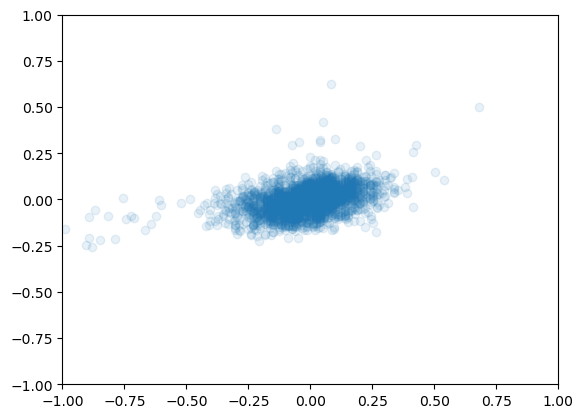

In [ ]:
fig, ax = plt.subplots()

ax.scatter(
    x=df_with_ls_analysis_test_scaled[TARGET],
    y=linreg.predict(df_with_ls_analysis_test_scaled[['3A', 'Coke 10-30 mm Added', 'O2_AMOUNT', 'GAS_AMOUNT', 'INJ_AMOUNT_CARBON']]),
    alpha=0.1,
)

ax.set_ylim(-1, 1)
ax.set_xlim(-1, 1)

In [218]:
dt = sklearn.ensemble.RandomForestRegressor(max_depth=8, n_estimators=100)
dt.fit(df_without_ls_analysis_train.iloc[:,:-1], df_without_ls_analysis_train[TARGET])

,n_estimators,100
,criterion,'squared_error'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [219]:
get_regression_metrics(dt, df_without_ls_analysis_test.iloc[:,:-1], df_without_ls_analysis_test[TARGET])

{'mae': np.float64(1.5974492164339198),
 'mse': np.float64(9.503223468672283),
 'max_error': np.float64(86.18034179949686),
 'mape': np.float64(0.03409046596108267)}

(40.0, 60.0)

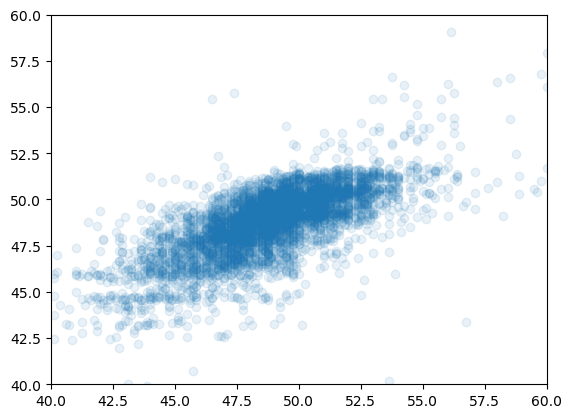

In [220]:
fig, ax = plt.subplots()

ax.scatter(
    x=df_without_ls_analysis_test[TARGET],
    y=dt.predict(df_without_ls_analysis_test.iloc[:,:-1]),
    alpha=0.1,
)

ax.set_ylim(40, 60)
ax.set_xlim(40, 60)

In [226]:
feat_importances = pd.DataFrame({
    'Feature': df_without_ls_analysis_train.columns[:-1],
    'Importance': dt.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [228]:
feat_importances.head(20)

,Feature,Importance
87,TEMP,0.258134
60,FOMI B2 Added,0.150027
89,O2_AMOUNT,0.116023
44,Total_Scrap_Charge,0.110894
56,Coke 10-30 mm Added,0.060350
85,total_charging_time,0.037895
0,16A,0.034439
88,VALO2_PPM,0.031723
91,INJ_AMOUNT_CARBON,0.026527
72,Lime Added,0.025346
